In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree

import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

import graphviz
!pip install ann_visualizer
import ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4167 sha256=d7855afc9c4b674c7456466272a239e396a80a5603fad5cac1b356037b01f8f7
  Stored in directory: /root/.cache/pip/wheels/1b/fc/58/2ab1c3b30350105929308becddda4fb59b1358e54f985e1f4a
Successfully built ann-visualizer


In [ ]:
df = pd.read_excel("/content/MI_Assignment1&2_Online Retail (1).xlsx")
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  float64       
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 33.1+ MB


In [ ]:
for i in df.columns:
    df[i].fillna(df[i].mode()[0],inplace=True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
df_train=[]
df_test=[]
a=-1
for i in df["InvoiceDate"]:
    a=a+1    
    if(i< datetime.strptime("2011-08-31 23:59:59","%Y-%m-%d %H:%M:%S")):
            df_train.append(df.iloc[a])
    else:
        df_test.append(df.iloc[a])
dftrain=pd.DataFrame(df_train)
dftest=pd.DataFrame(df_test)

In [ ]:
Customer_ID = list(dftest["CustomerID"])
Customer_ID=np.array(Customer_ID)
Customer_ID=np.unique(Customer_ID)

In [ ]:
l=[0]*len(dftrain)
for index in range(len(dftrain)):
    l[index] = "Not Churn" if dftrain["CustomerID"].iloc[index] in Customer_ID else "Churn"

In [ ]:
dftrain["Label"]=l

In [ ]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320705 entries, 0 to 320704
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    320705 non-null  object        
 1   StockCode    320705 non-null  object        
 2   Description  320705 non-null  object        
 3   Quantity     320705 non-null  float64       
 4   InvoiceDate  320705 non-null  datetime64[ns]
 5   UnitPrice    320705 non-null  float64       
 6   CustomerID   320705 non-null  float64       
 7   Country      320705 non-null  object        
 8   Label        320705 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 24.5+ MB


In [ ]:
categorical_features=["InvoiceNo","StockCode","Description","Country","InvoiceDate"]
Numerical_features=["Quantity","UnitPrice","CustomerID","Label"]

In [ ]:
x=dftrain[Numerical_features].iloc[:,0:-1].values
y=dftrain[Numerical_features].iloc[:,-1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

#Decision Tree

In [ ]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 3, min_samples_leaf = 5)
clfe=clf_entropy.fit(X_train, y_train)

In [ ]:
y_pred = clfe.predict(X_test)
print(y_pred)

['Not Churn' 'Not Churn' 'Not Churn' ... 'Not Churn' 'Not Churn'
 'Not Churn']


In [ ]:


dec_acc=accuracy_score(y_test,y_pred)*100
dec_acc

86.29532160095789

In [ ]:
cr_dt=classification_report(y_test, y_pred)
cr_dt

'              precision    recall  f1-score   support\n\n       Churn       0.90      0.01      0.02     11064\n   Not Churn       0.86      1.00      0.93     69113\n\n    accuracy                           0.86     80177\n   macro avg       0.88      0.50      0.47     80177\nweighted avg       0.87      0.86      0.80     80177\n'

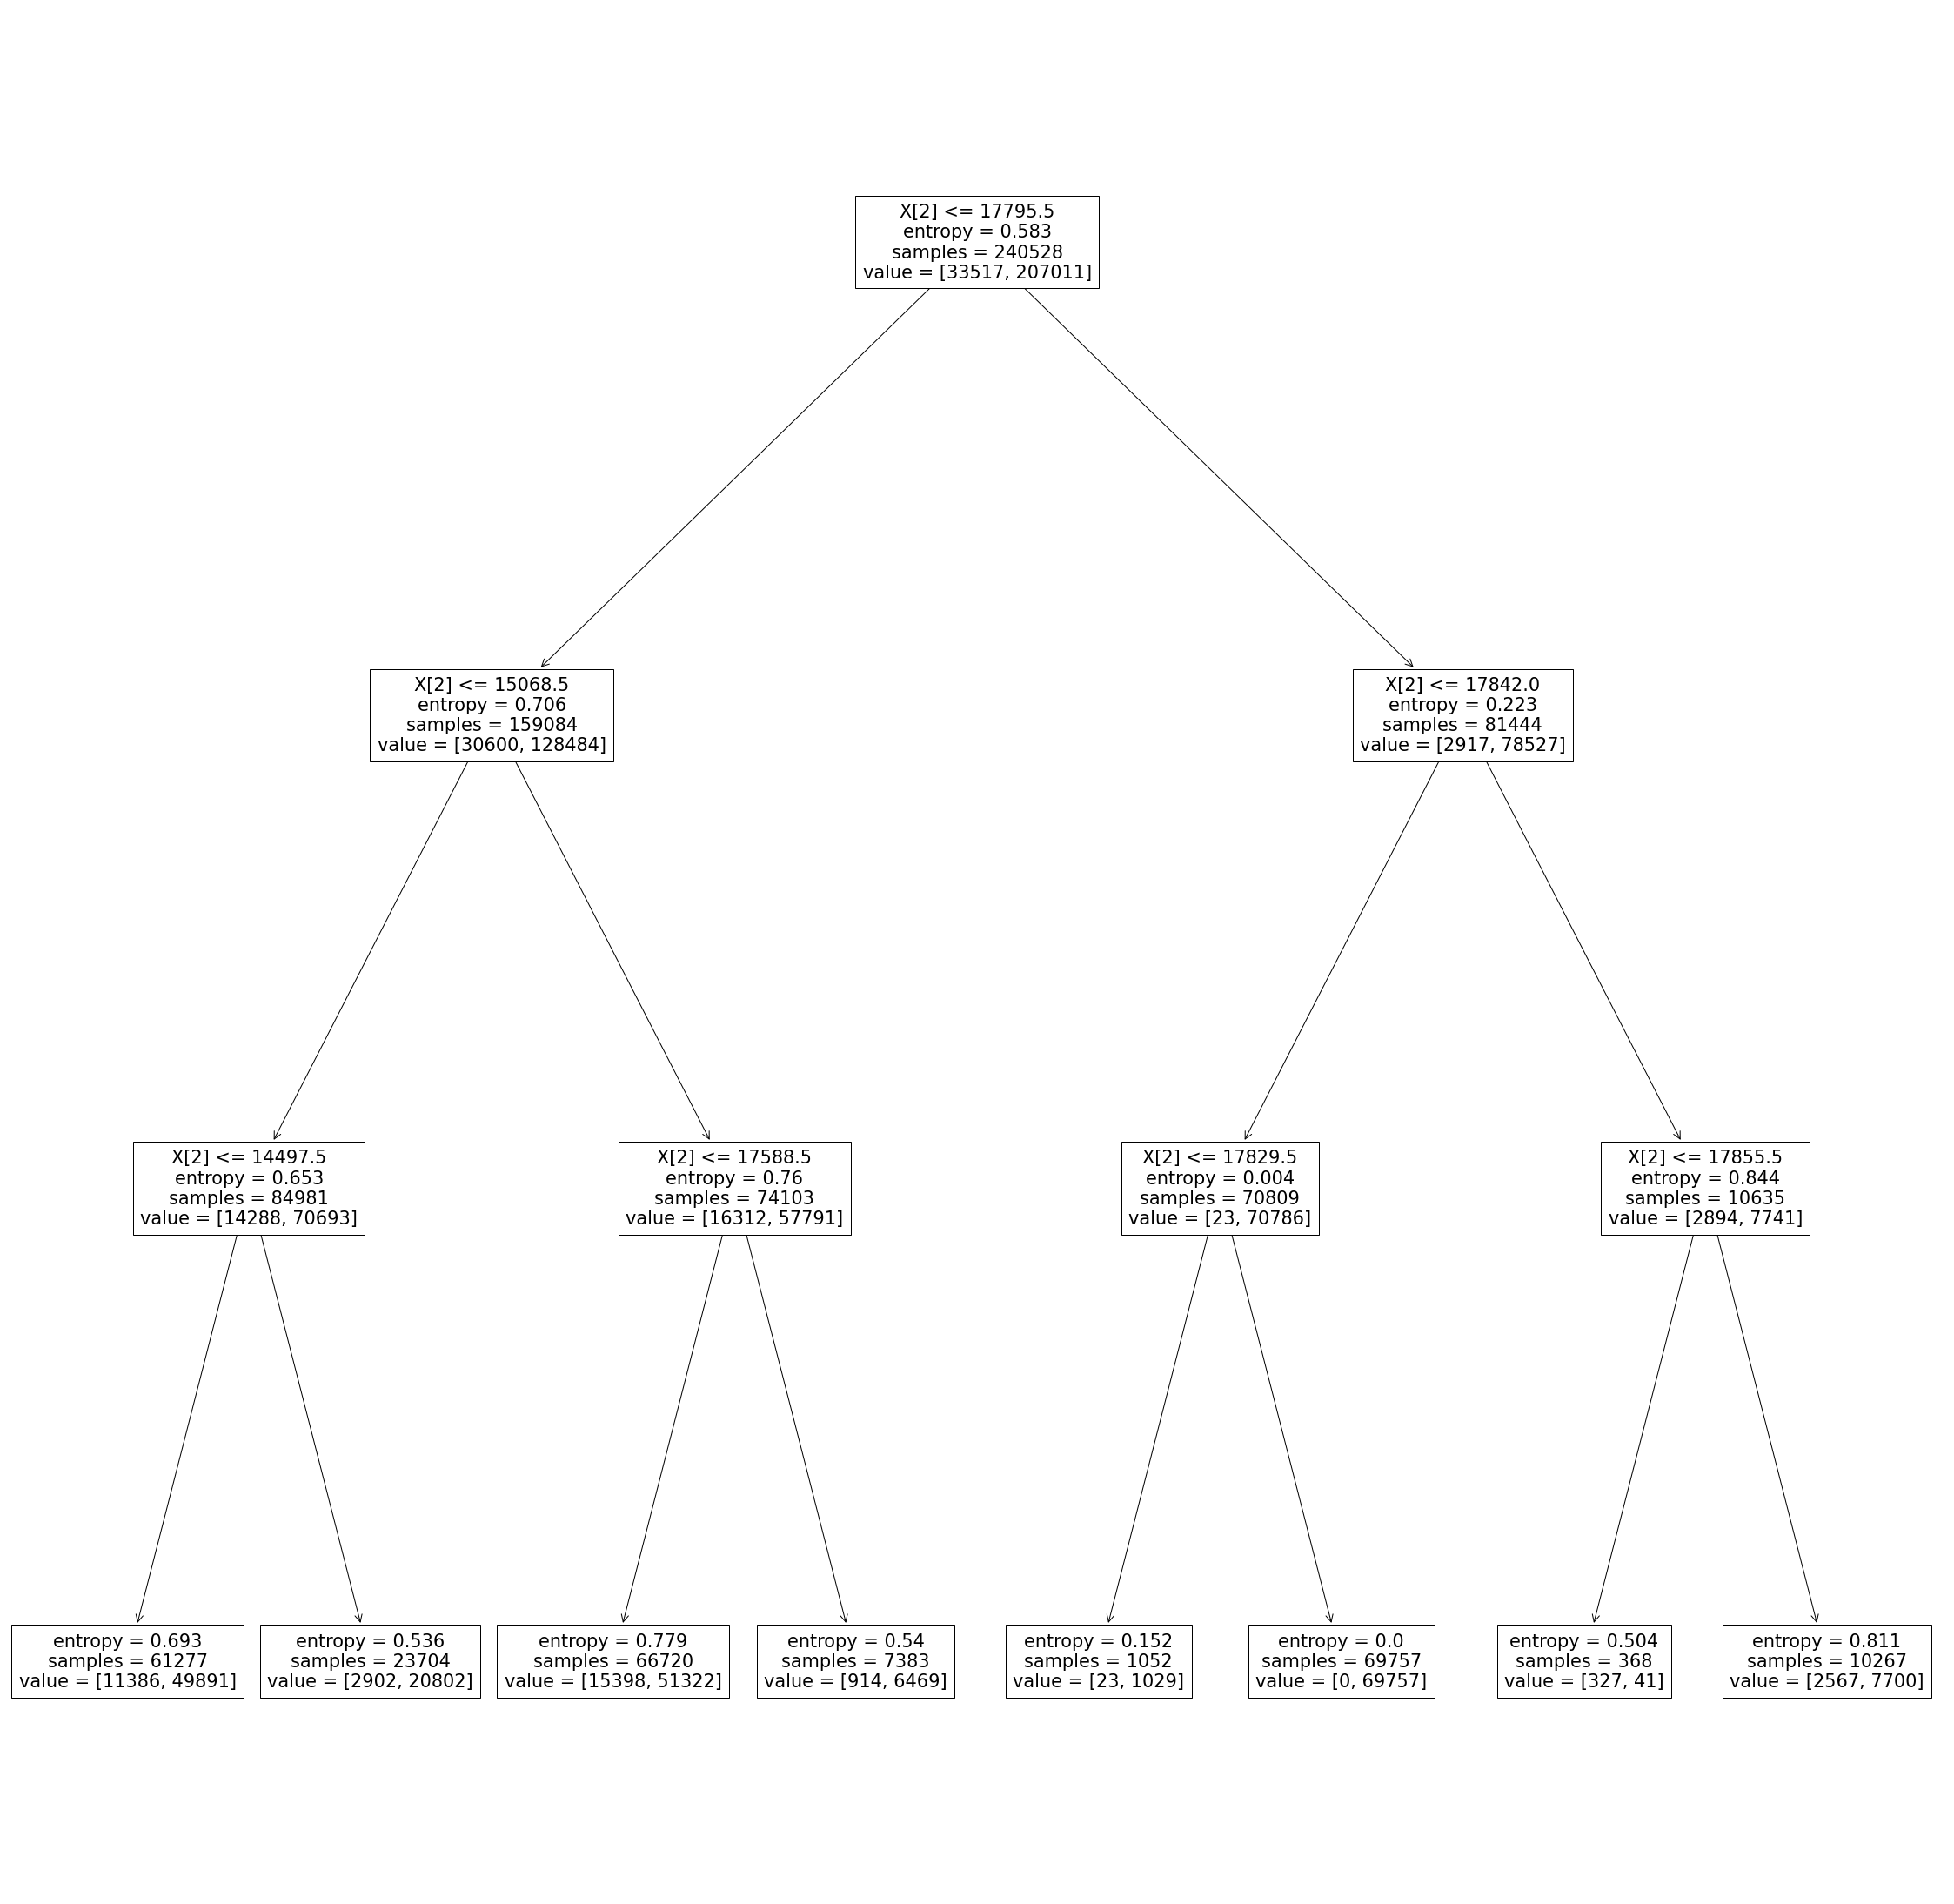

In [ ]:
plt.figure(figsize=(40,40))
tree.plot_tree(clfe)
plt.show()

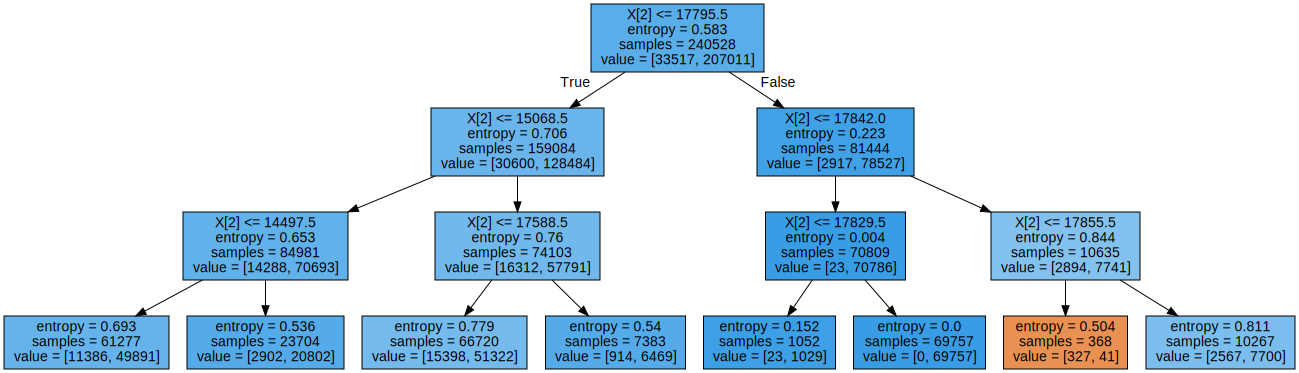

In [ ]:
dot_data = tree.export_graphviz(clfe, out_file=None,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph


#SUPPORT VECTOR MACHINE

In [ ]:
model=SVC()
model.fit(X_train,y_train)

SVC()

In [ ]:
predictions = model.predict(X_test)
predictions

array(['Not Churn', 'Not Churn', 'Not Churn', ..., 'Not Churn',
       'Not Churn', 'Not Churn'], dtype=object)

In [ ]:
svm_accuracy=accuracy_score(y_test,y_pred)*100
svm_accuracy

86.29532160095789

In [ ]:
cr_svm=classification_report(y_test, predictions)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Artificial Neural network

In [ ]:
clf = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(15,), random_state=1)
clf.fit(X_train, y_train)
p2=clf.predict(X_test)

In [ ]:
#calculating accuracy 
ANN_accuracy=accuracy_score(y_test,p2)*100

In [ ]:
#generating report 
cr_ANN=classification_report(y_test, p2)

In [ ]:
print(ANN_accuracy)

86.2017785649251


In [ ]:
print("DECISION TREE REPORT:\n",cr_dt)
print("SVM REPORT:\n",cr_svm)
print("ANN TREE REPORT:\n",cr_ANN)


DECISION TREE REPORT:
               precision    recall  f1-score   support

       Churn       0.90      0.01      0.02     11064
   Not Churn       0.86      1.00      0.93     69113

    accuracy                           0.86     80177
   macro avg       0.88      0.50      0.47     80177
weighted avg       0.87      0.86      0.80     80177

SVM REPORT:
               precision    recall  f1-score   support

       Churn       0.00      0.00      0.00     11064
   Not Churn       0.86      1.00      0.93     69113

    accuracy                           0.86     80177
   macro avg       0.43      0.50      0.46     80177
weighted avg       0.74      0.86      0.80     80177

ANN TREE REPORT:
               precision    recall  f1-score   support

       Churn       1.00      0.00      0.00     11064
   Not Churn       0.86      1.00      0.93     69113

    accuracy                           0.86     80177
   macro avg       0.93      0.50      0.46     80177
weighted avg       0